<a href="https://colab.research.google.com/github/codingCapricorn/K-Means-Algorithm/blob/master/3_Own_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building Own K-Means Clustering Model Using Python Functions ::::

####Objective of clustering model is to develop own K-means from scratch by implementing python functions by separating data points into separate clusters(pre-determined) maximizing inter-cluster distance and minimizing intra-cluster distance(increasing similarity).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class kmeans:
    """Apply kmeans algorithm"""
    def __init__(self, num_clusters, max_iter=1000):
        """Initialize number of clusters"""
        
        self.num_clusters = num_clusters
        self.max_iter = max_iter
    
    def initalize_centroids(self, X):
        """Choosing k centroids randomly from data X"""
        
        idx = np.random.permutation(X.shape[0])
        centroids = X[idx[:self.num_clusters]]
        return centroids
        
    def compute_centroid(self, X, labels):
        """Modify centroids by finding mean of all k partitions"""
        
        centroids = np.zeros((self.num_clusters, X.shape[1]))
        for k in range(self.num_clusters):
            centroids[k] = np.mean(X[labels == k], axis=0)
            
        return centroids
    
    def compute_distance(self, X, centroids):
        """Computing L2 norm between datapoints and centroids"""

        distances = np.zeros((X.shape[0], self.num_clusters))
        
        for k in range(self.num_clusters):
            dist = np.linalg.norm(X - centroids[k], axis=1)
            distances[:,k] = np.square(dist)
            
        return distances
    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def fit(self, X):
        self.centroids = self.initalize_centroids(X)
        
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroid(X, self.labels)
            
            if np.all(old_centroids == self.centroids):
                break
        
    def compute_sumstar(self, distances):
        """Computing sum total of all distances"""
        pass

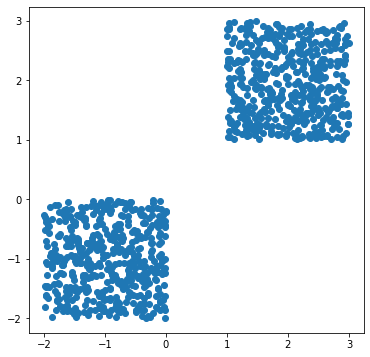

In [2]:
# creating an artificial test case

np.random.RandomState(1234)
data = -2 * np.random.rand(1000, 2) 
data[500:] = 1 + 2 * np.random.rand(500,2)

# plotting the data 

plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:, 1])
plt.show()

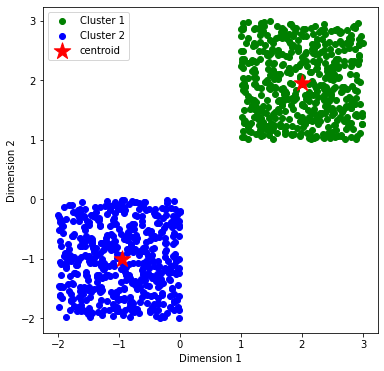

In [3]:
# Applying k-means on the data

kmeansmodel = kmeans(num_clusters=2, max_iter=100)
kmeansmodel.fit(data)
centroids = kmeansmodel.centroids

centroids[0]

# plotting the clustered data with the centoids

plt.figure(figsize=(6,6))
plt.scatter(data[kmeansmodel.labels == 0, 0], data[kmeansmodel.labels == 0, 1], c = 'green', label = 'Cluster 1')
plt.scatter(data[kmeansmodel.labels == 1, 0], data[kmeansmodel.labels == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c = 'red', s = 300, label = 'centroid')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

#Using Python Library Functions ::::

The same 50 lines of task can be done within a few lines by importing the scikit-learn library.

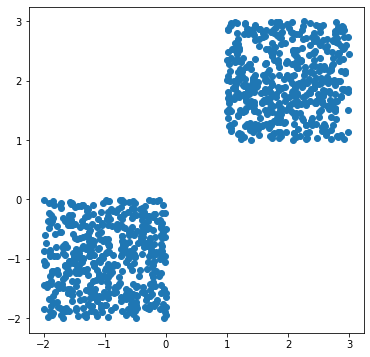

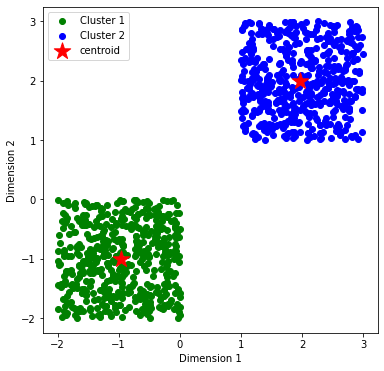

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# creating an artificial test case

np.random.RandomState(1234)
data = -2 * np.random.rand(1000, 2) 
data[500:] = 1 + 2 * np.random.rand(500,2)

# plotting the data 

plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:, 1])
plt.show()

kmeansmodel = KMeans(n_clusters=2)
kmeansmodel.fit(data)

# plotting the clustered data with the centoids

plt.figure(figsize=(6,6))
plt.scatter(data[kmeansmodel.labels_ == 0, 0], data[kmeansmodel.labels_ == 0, 1], c = 'green', label = 'Cluster 1')
plt.scatter(data[kmeansmodel.labels_ == 1, 0], data[kmeansmodel.labels_ == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], marker='*', c = 'red', s = 300, label = 'centroid')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()